In [1]:
import pandas as pd
import os

os.chdir("C:\\Users\\Madhav\\Desktop\\PAZ Code\\Dataset")

movies=pd.read_csv('Movie-Ratings.csv')
movies.head()
movies.columns
movies.rename(columns={ 'Rotten Tomatoes Ratings %':'CriticRatings', 'Audience Ratings %':'AudienceRatings',
       'Budget (million $)':'BudgetMillions', 'Year of release':'ReleaseYear'},inplace=True)  #Renaming columns to remove spaces
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies.info()  #Release year is seemingly integer type but the operations on this field needn't be integral, it should 
               #instead be categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [3]:
movies.Film=movies.Film.astype('category')   #changing to category variable
movies.ReleaseYear=movies.ReleaseYear.astype('category')
movies.Genre=movies.Genre.astype('category')
print(movies.Genre.cat.categories)          #to print unique values/levels in a category variable

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')


---

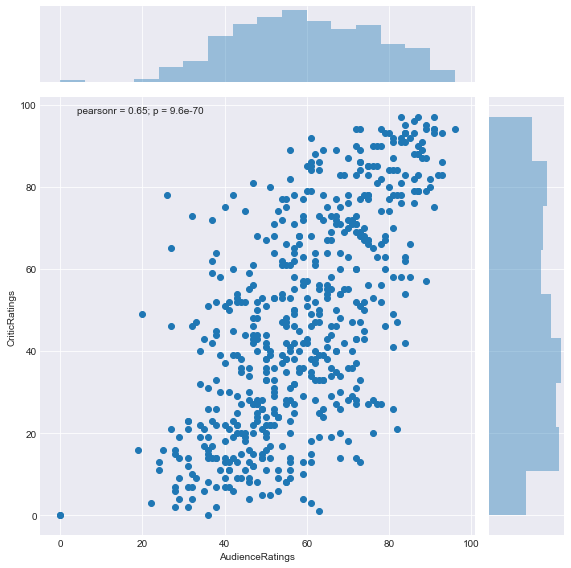

In [36]:
#Joint Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,6

vis=sns.jointplot(data=movies,x='AudienceRatings',y='CriticRatings',size=8)



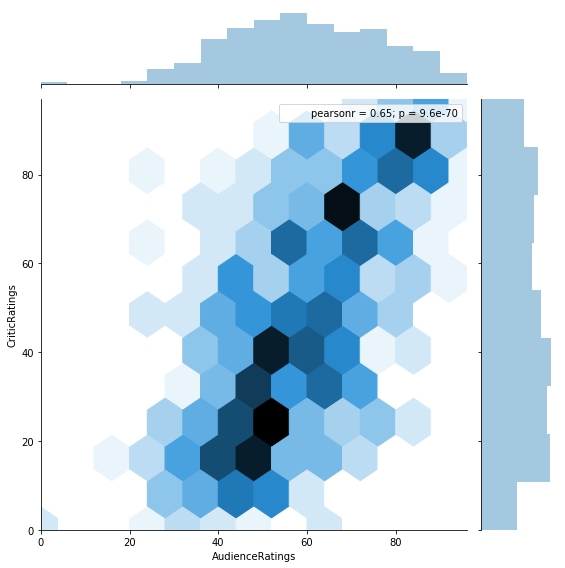

In [6]:
vis=sns.jointplot(data=movies,x='AudienceRatings',y='CriticRatings',size=8,kind='hex') #changing kind of plot from default scatter
                                                                                       #to hexagonal plot which is reflective of
                                                                                       #cluster and high distribution

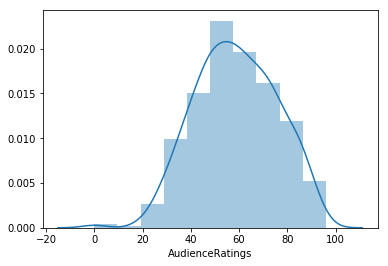

In [7]:
#histograms

vis=sns.distplot(movies.AudienceRatings,bins=10)   #plotting a single field     

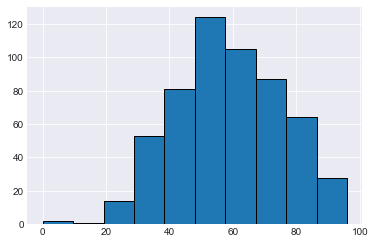

In [8]:
sns.set_style('darkgrid')
vis2=plt.hist(movies.AudienceRatings,bins=10,edgecolor='black') #using hist method from plt around which distplot is wrapped
                                                                #using edgecolor to border the histogram bars

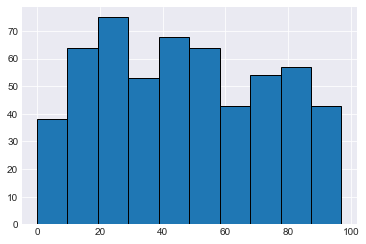

In [9]:
vis3=plt.hist(movies.CriticRatings,bins=10,edgecolor='black')  #visibly critic ratings are more uniformally distributed than audience ratings as 
                                             #audience ratings are more emotion influenced but critics judge on fixed parameters

---

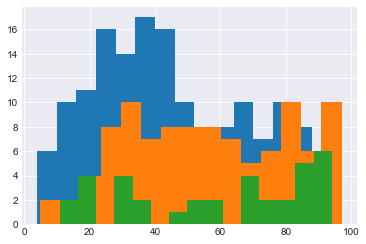

In [10]:
#Stacked histograms
v1=plt.hist(movies[movies.Genre=='Action'].CriticRatings,bins=15)  #using filter to visualize movie genre specidic data
v2=plt.hist(movies[movies.Genre=='Drama'].CriticRatings,bins=15)
v3=plt.hist(movies[movies.Genre=='Thriller'].CriticRatings,bins=15)
#displays histograms overlapped over each other

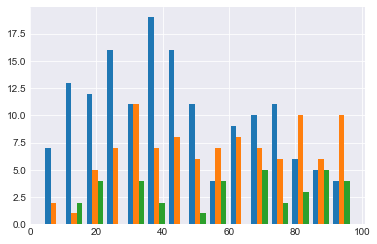

In [11]:
v1=plt.hist([movies[movies.Genre=='Action'].CriticRatings,movies[movies.Genre=='Drama'].CriticRatings,
            movies[movies.Genre=='Thriller'].CriticRatings],bins=15)
#using list of lists as a series parameter displays side by side histogram

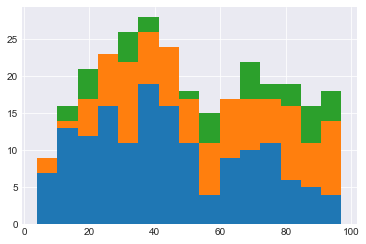

In [12]:
v1=plt.hist([movies[movies.Genre=='Action'].CriticRatings,movies[movies.Genre=='Drama'].CriticRatings,
            movies[movies.Genre=='Thriller'].CriticRatings],bins=15,stacked=True)  #prints stacked histogram

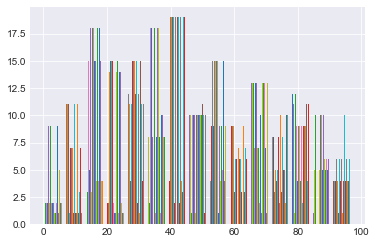

In [18]:
lom_g=list()
for g in movies.Genre:
    lom_g.append(movies[movies.Genre==g].CriticRatings)
v2=plt.hist(lom_g,bins=15)                #an attempt to avoid repetition
#Note that using just movies.Genre iterates through the genre values repetitively

In [21]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

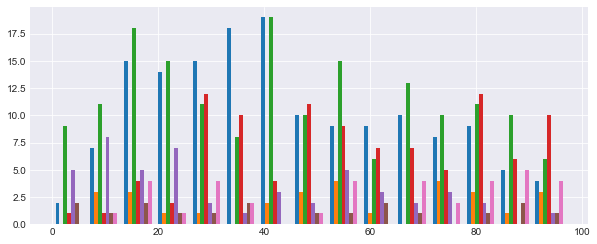

In [24]:
lom_g=list()
for g in movies.Genre.cat.categories:                        #using categories entry to iterate
    lom_g.append(movies[movies.Genre==g].CriticRatings)     #using categories to iterate through unique genre values
v2=plt.hist(lom_g,bins=15)                

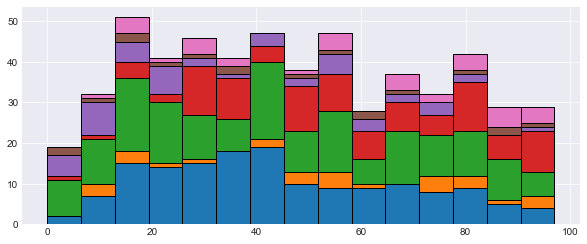

In [26]:
lom_g=list()
for g in movies.Genre.cat.categories:                        #using categories entry to iterate
    lom_g.append(movies[movies.Genre==g].CriticRatings)     #using categories to iterate through unique genre values
v2=plt.hist(lom_g,bins=15,rwidth=1,stacked=True,edgecolor='black')      #rwidth used to remove the gap between bars          

In [30]:
list(movies.Genre.cat.categories)

['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

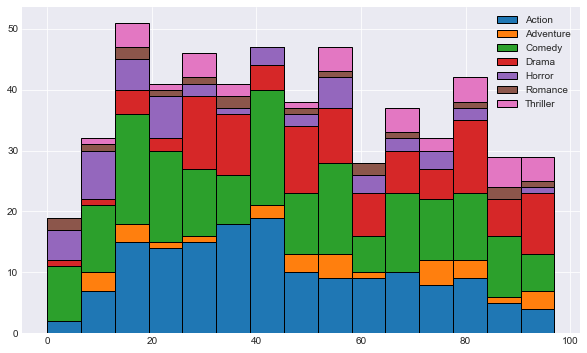

In [38]:
lom_g=list()
for g in movies.Genre.cat.categories:                        #using categories entry to iterate
    lom_g.append(movies[movies.Genre==g].CriticRatings)     #using categories to iterate through unique genre values
v2=plt.hist(lom_g,bins=15,rwidth=1,stacked=True,edgecolor='black',label=list(movies.Genre.cat.categories))
plt.legend()          
plt.show()

---

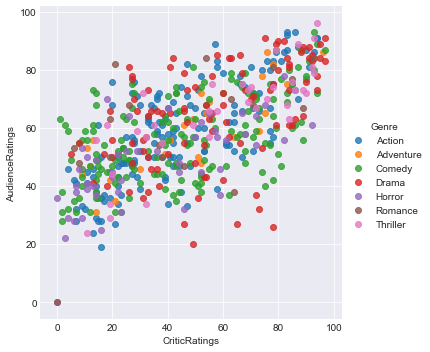

In [51]:
#KDE plots
#print(movies.columns)
v=sns.lmplot(data=movies,x='CriticRatings',y='AudienceRatings',fit_reg=False,hue='Genre')  #another scatter plot to visualize
                                                                                        #Audience vs critic ratings


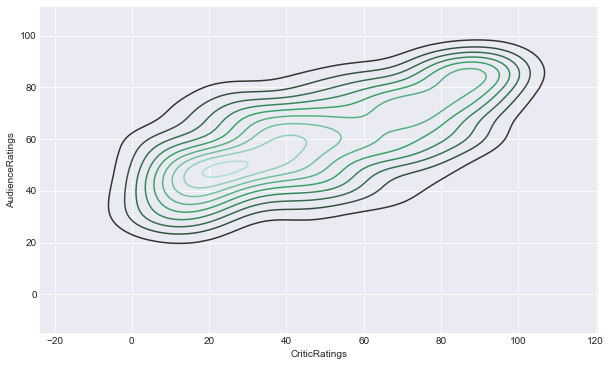

In [53]:
v2=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings)

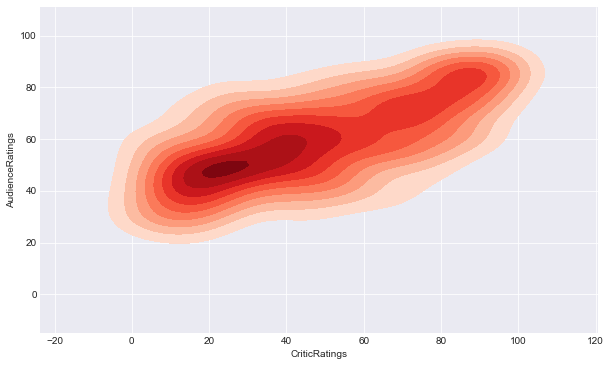

In [55]:
v2=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds')
#using shade to display solid visualization, shade_lowest for grids and cmap for color

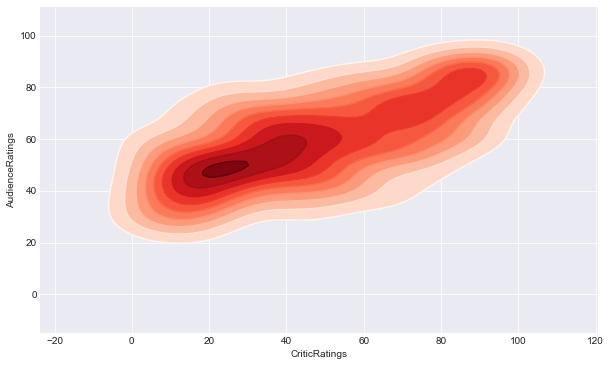

In [57]:
v2=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds')
v2=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,cmap='Reds')
#using just the borderline plot below to better accentuate the boundaries of kdeplot

---

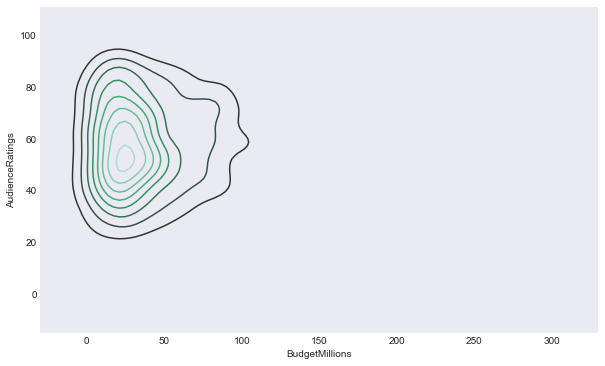

In [61]:
#working with subplots
sns.set_style('dark')
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings)

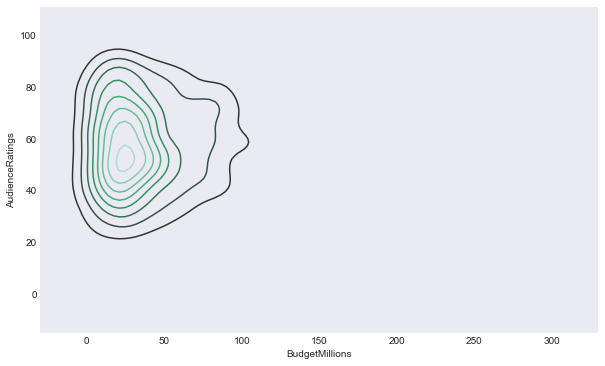

In [63]:
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings)

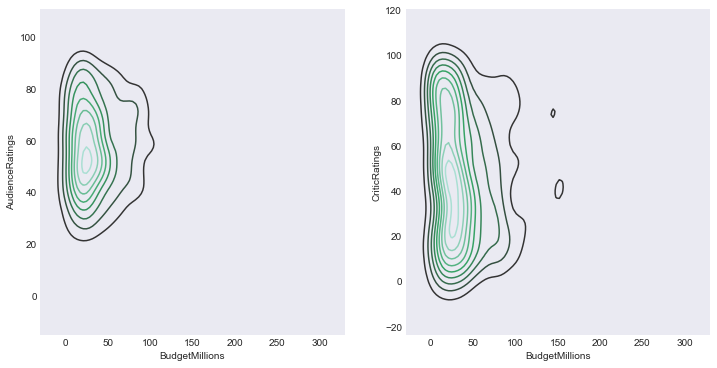

In [66]:
f,axes=plt.subplots(1,2,figsize=(12,6))   #subplot returns (figure,axes) where axes may be an array
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0]) #plots on 1st subplot, since ax=axes[0]
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings,ax=axes[1])   #plots on 2nd subplot, since ax=axes[1]

[(-20, 160)]

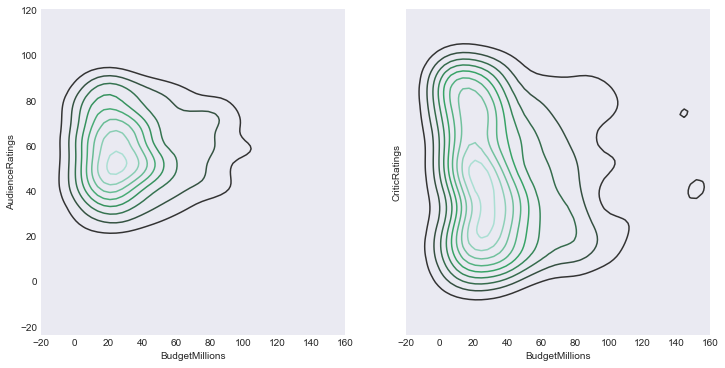

In [70]:
f,axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)#sharex and sharey to keep the x and y axes range same for both subplots
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0]) 
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings,ax=axes[1])   
k1.set(xlim=(-20,160))  #to set range of x-axis values

---

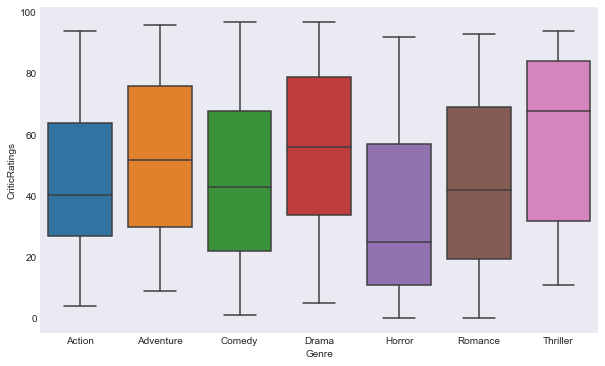

In [73]:
#Violinplots vs boxplots
b=sns.boxplot(data=movies,x='Genre',y='CriticRatings')

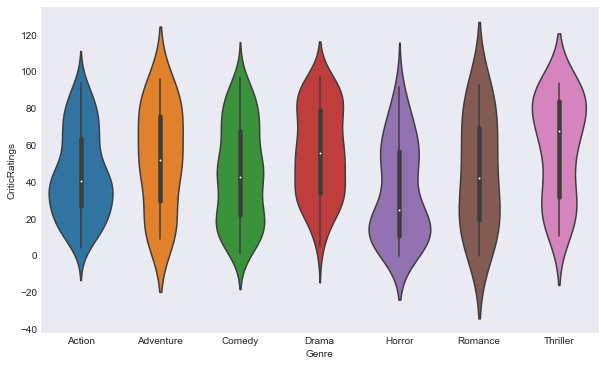

In [75]:
v=sns.violinplot(data=movies,x='Genre',y='CriticRatings')

---

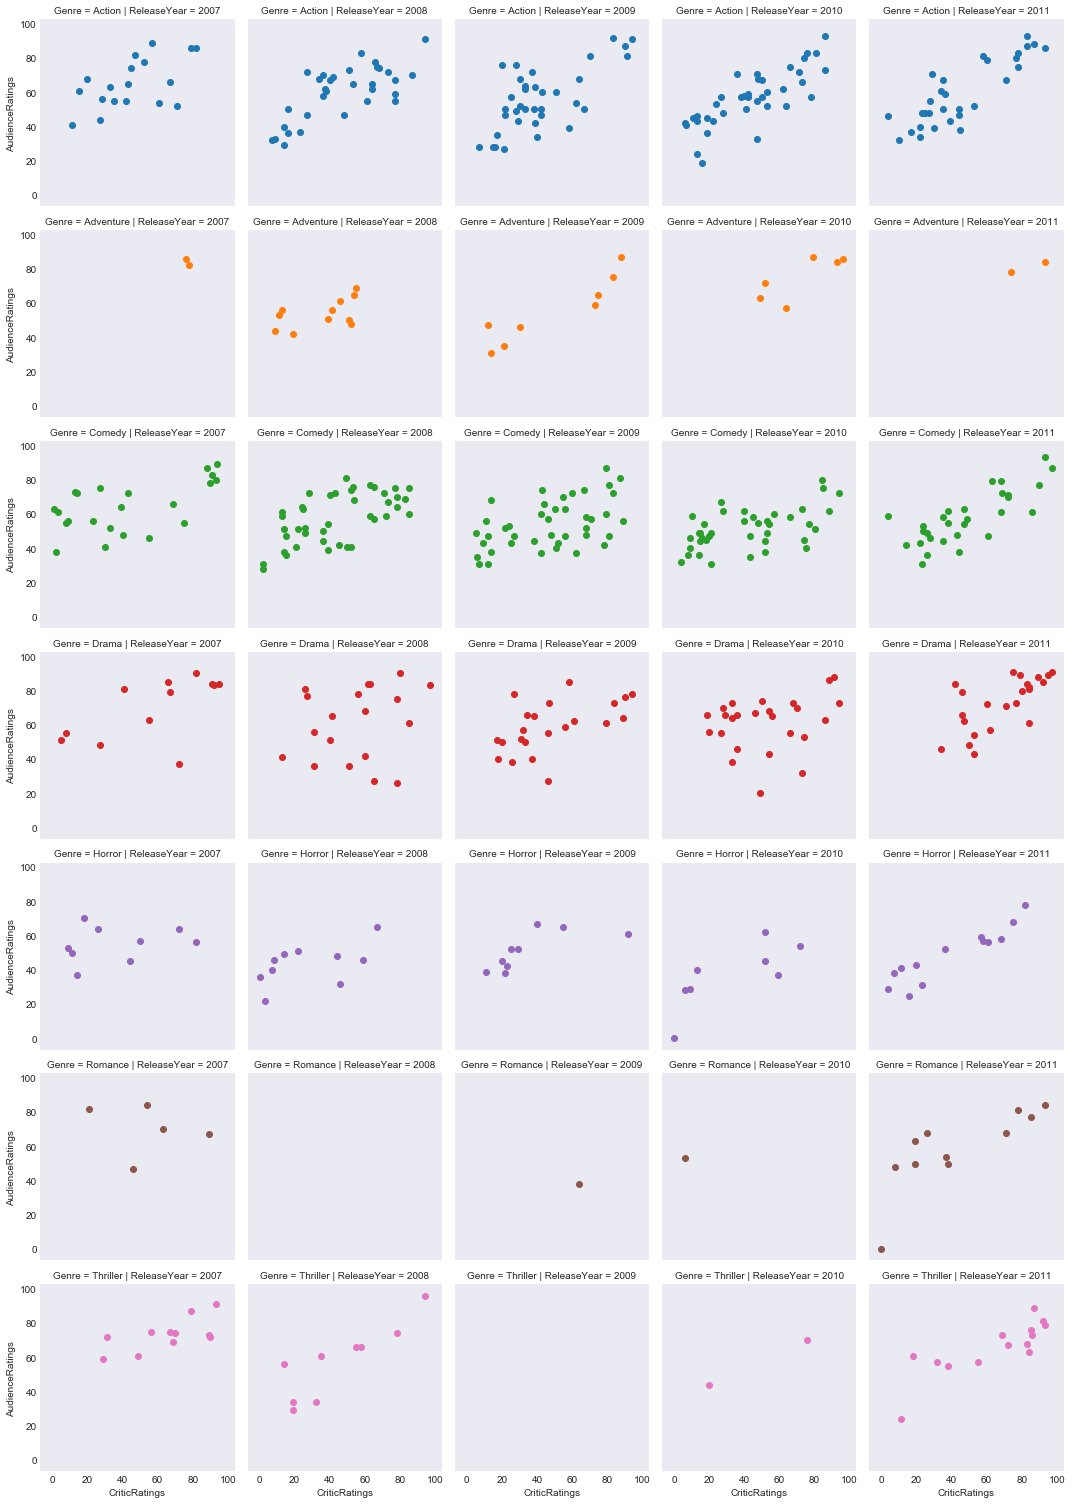

In [77]:
#Creating a facet grid
f=sns.FacetGrid(movies,row='Genre',col='ReleaseYear',hue='Genre') #grids akin to subplots, expanded form of grid backgrounds
f=f.map(plt.scatter,'CriticRatings','AudienceRatings')  #Arguments on the basis of the arguments of the function passed

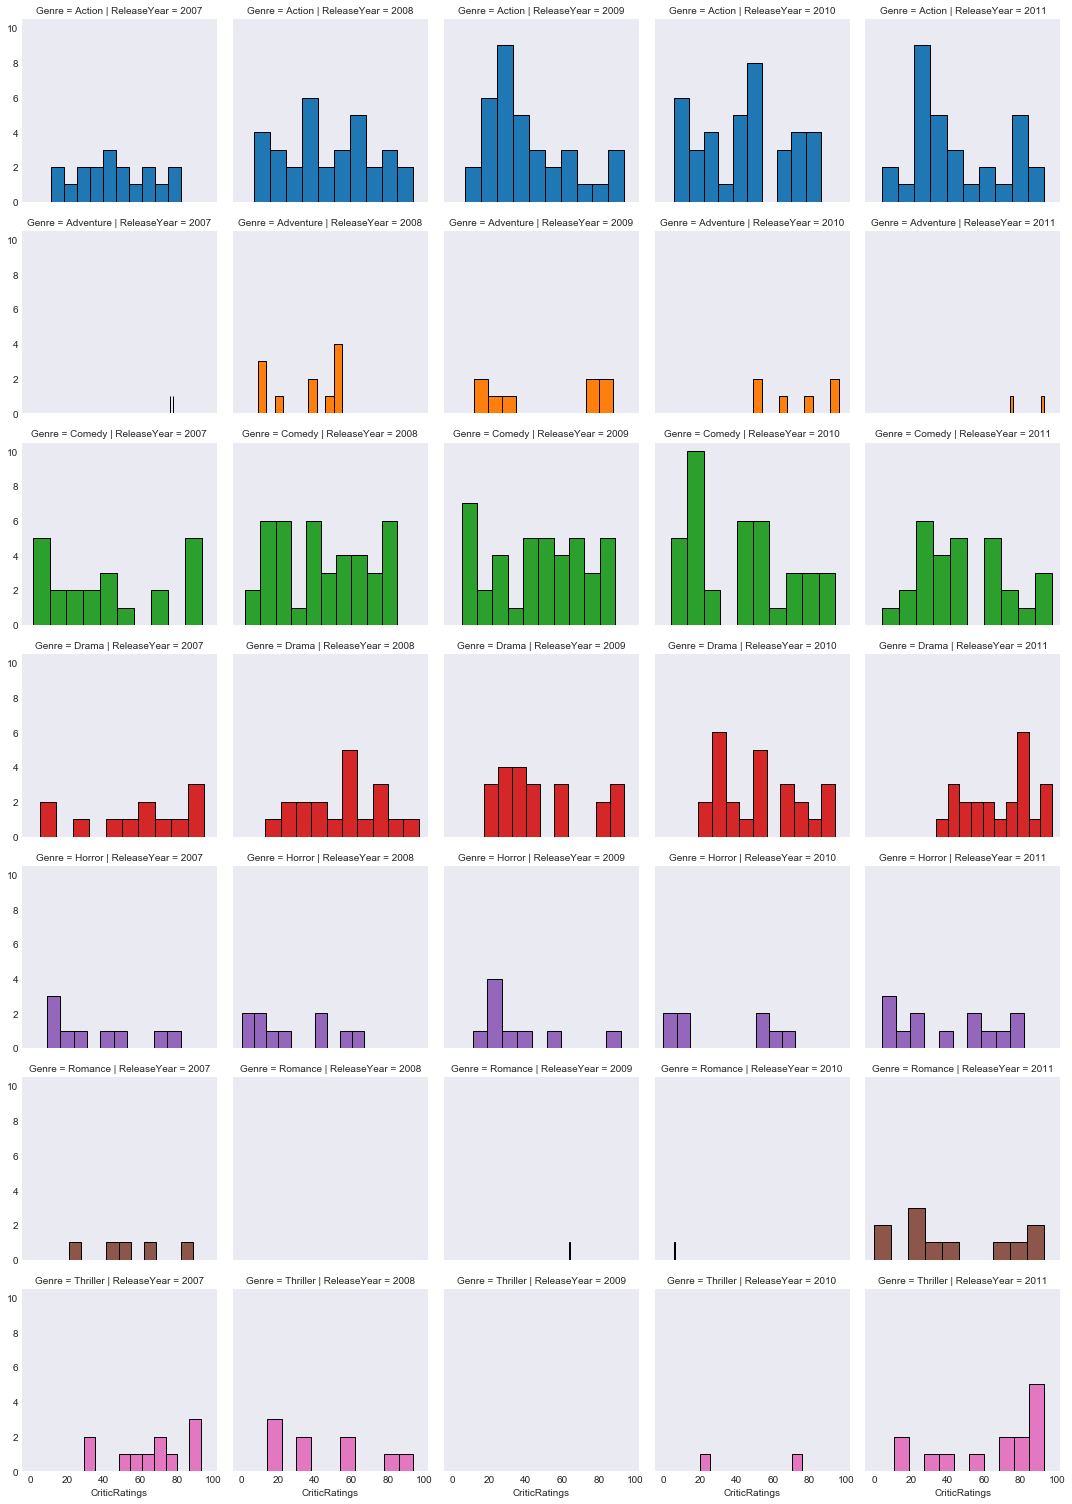

In [80]:
f=sns.FacetGrid(movies,row='Genre',col='ReleaseYear',hue='Genre') #facet grid for histograms
f=f.map(plt.hist,'CriticRatings',edgecolor='Black')
#plt.hist()

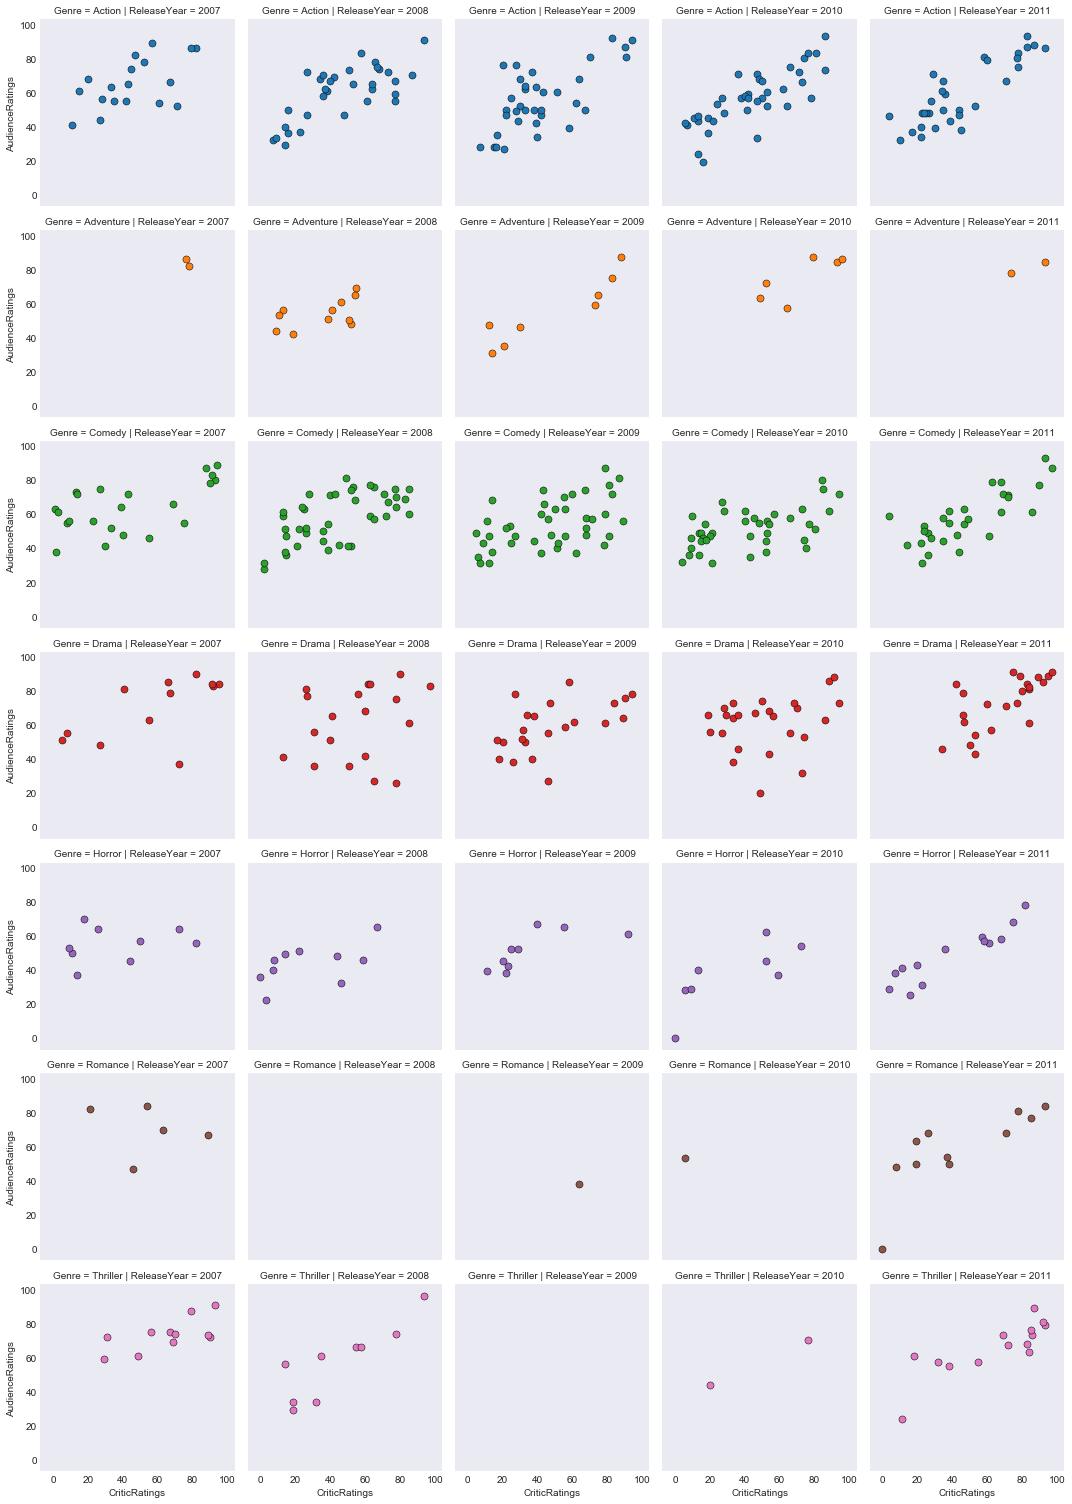

In [82]:
f=sns.FacetGrid(movies,row='Genre',col='ReleaseYear',hue='Genre') #grids akin to subplots
kws=dict(s=50,edgecolor='black',linewidth=0.5)
f=f.map(plt.scatter,'CriticRatings','AudienceRatings',**kws)  #passing dictionary to the original function arguments


---

---

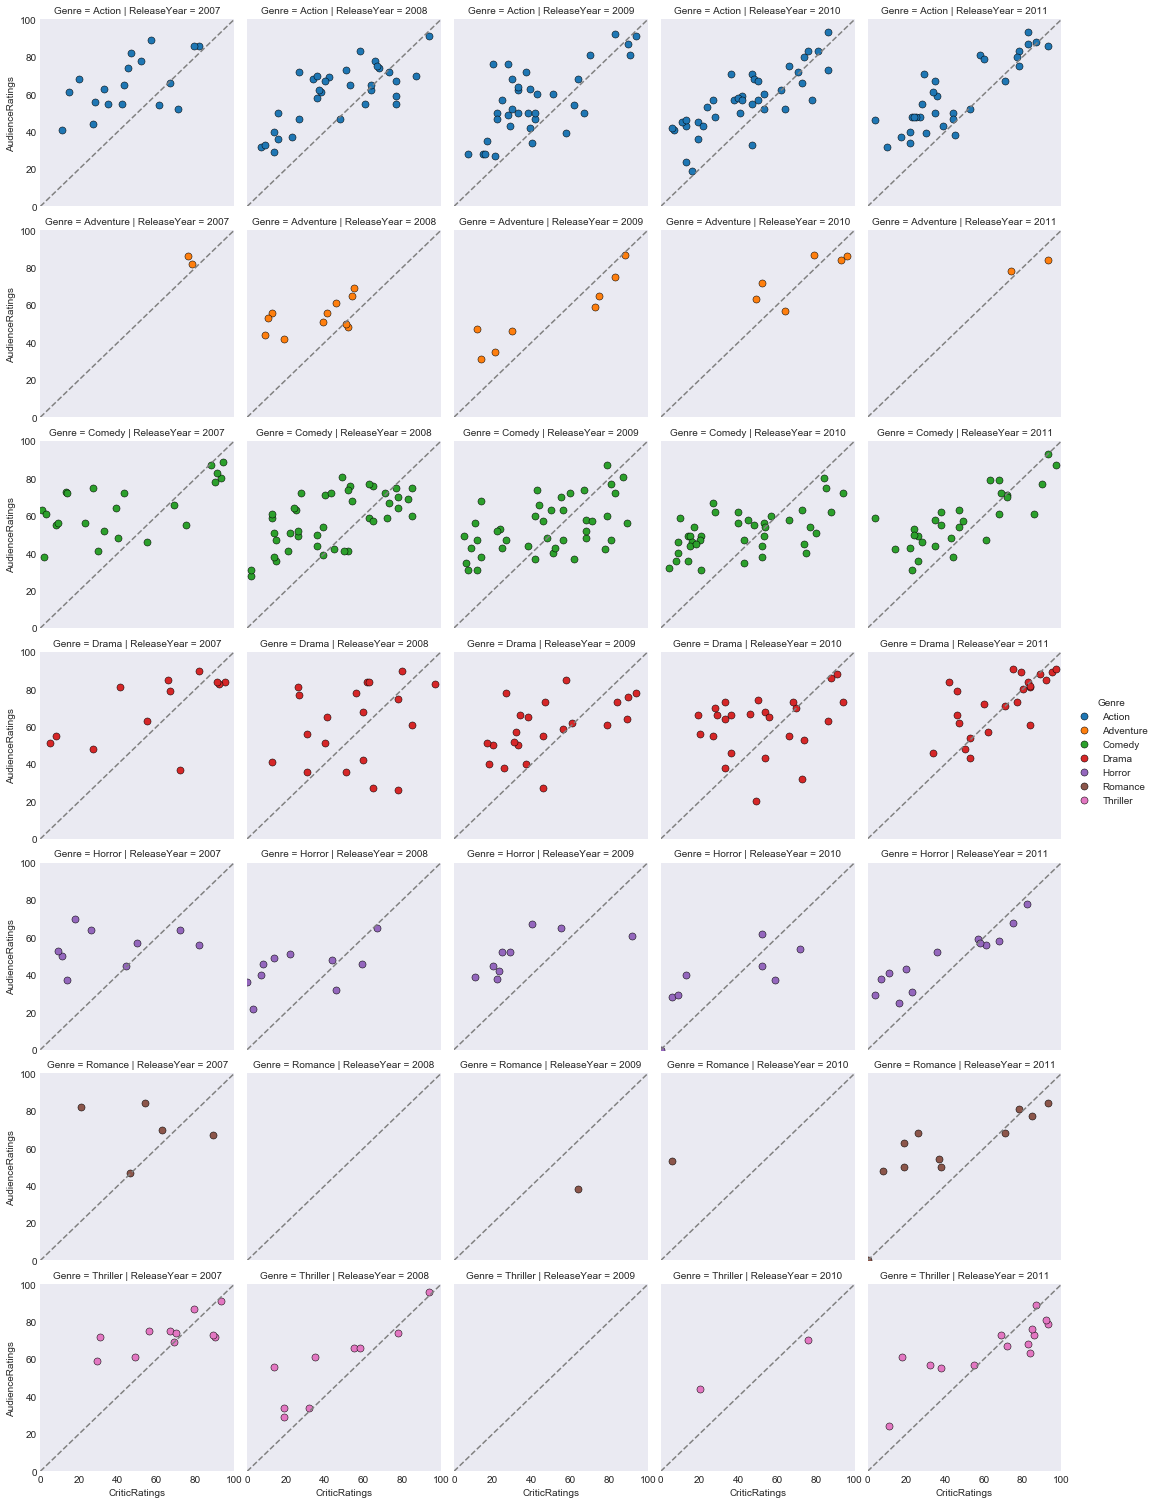

In [85]:
#Coordinates and diagonals
f=sns.FacetGrid(movies,row='Genre',col='ReleaseYear',hue='Genre') 
kws=dict(s=50,edgecolor='black',linewidth=0.5)
f=f.map(plt.scatter,'CriticRatings','AudienceRatings',**kws)  
f.set(xlim=(0,100),ylim=(0,100))   #to set limit of a nd y axes of the facet grids
for ax in f.axes.flat:            #axes to access all facet grids and flat to iterate over 2d array
    ax.plot((0,100),(0,100),c='gray',ls='--')
f.add_legend()

---

---

---

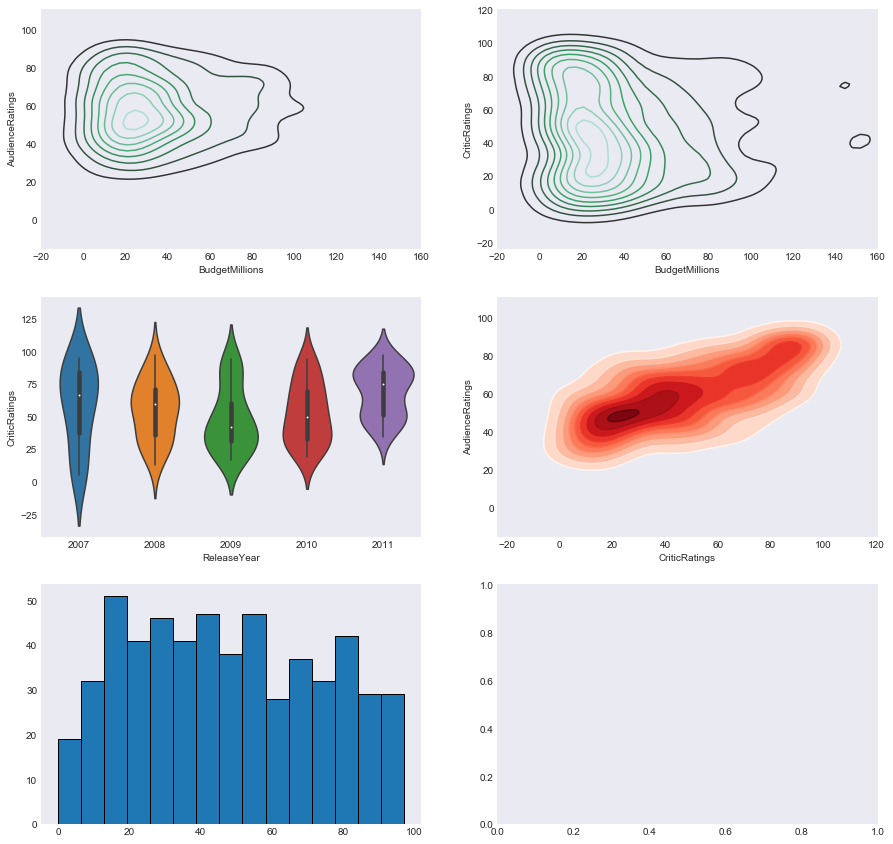

In [90]:
#building dashboards in python
sns.set_style('dark')
f,axes=plt.subplots(3,2,figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings,ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
b=sns.violinplot(data=movies[movies.Genre=='Drama'],x='ReleaseYear',y='CriticRatings',ax=axes[1,0])
k3=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds',ax=axes[1,1])
k4=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,cmap='Reds',ax=axes[1,1])
h=axes[2,0].hist(movies.CriticRatings,bins=15,edgecolor='black')  #standard method for including in dashboard, diff. from that
                                                                  #for seaborn


---

---

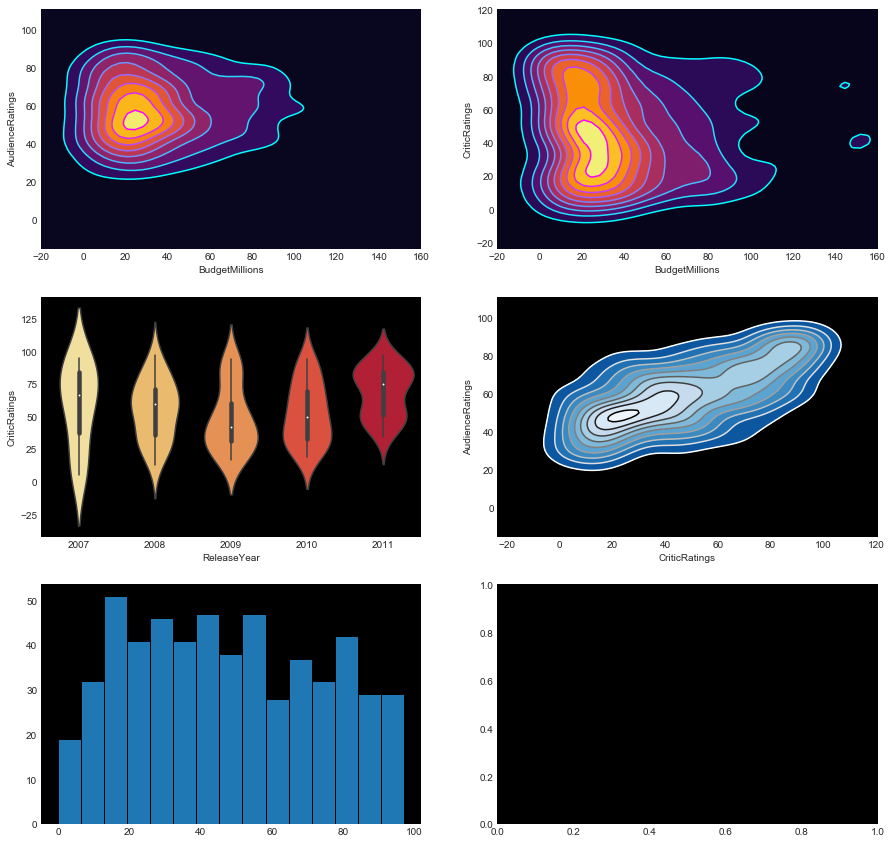

In [99]:
#Styling tips
sns.set_style('dark',{'axes.facecolor':'black'})  #dictionary for making background black
f,axes=plt.subplots(3,2,figsize=(15,15))

k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,0],shade=True,shade_lowest=True,cmap="inferno")
k1b=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,0],cmap="cool")

k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings,ax=axes[0,1],shade=True,shade_lowest=True,cmap='inferno')
k2b=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings,ax=axes[0,1],cmap='cool')

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

b=sns.violinplot(data=movies[movies.Genre=='Drama'],x='ReleaseYear',y='CriticRatings',ax=axes[1,0],palette='YlOrRd') #palette for changing color

k3=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Blues_r',ax=axes[1,1])
k3b=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,cmap='gist_gray_r',ax=axes[1,1])

h=axes[2,0].hist(movies.CriticRatings,bins=15,edgecolor='black')


---

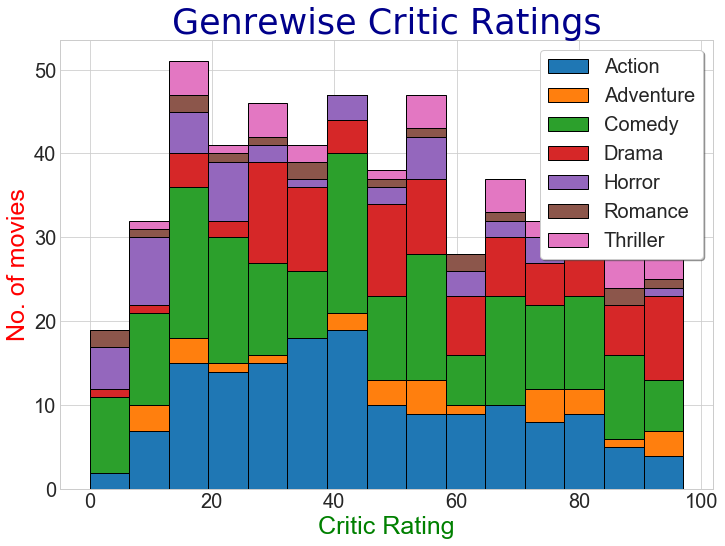

In [108]:
#Finishing touches- thematic edits
sns.set_style('whitegrid')
lom_g=list()
for g in movies.Genre.cat.categories:                        
    lom_g.append(movies[movies.Genre==g].CriticRatings)  
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)  #hack to increase the size, the dimension is for A4 paper
v2=plt.hist(lom_g,bins=15,rwidth=1,stacked=True,edgecolor='black',label=list(movies.Genre.cat.categories))
plt.title('Genrewise Critic Ratings',fontsize=35,color='DarkBlue',fontname='Console')
plt.ylabel('No. of movies',color='Red',fontsize=25)
plt.xlabel('Critic Rating',color='Green',fontsize=25)  #to add labels on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)   #to change size of label on the axes
plt.legend(prop={'size':20},frameon=True,shadow=True,framealpha=1) #parameters for size,frame,shadow and opaquicity        
plt.show()